Analysis of the damping and delay between the stage in the Quarry Lakes and the shallow and deep groundater in Fremont (Ca) 2023

To analyze the groundwater neer the Quarry Lakes in Fremont California, use is made of three availabel time series: 1( the stage of the lakes, that are in direct contact with the shallow groundwater, 2) the head in the shallow aquifer at about 1000 m from the lake-area circumference and 3) the head in the deeper aquifer at the same location.

The sries show that the signals are related, yet the groundwater head signals are damped and delayed. The best way to show this is to overlap the signals by stretching or compressing the vertical scale of the head time series with respect to that of the lakes and to shift the graphs along the time axis to estimate the delay with respect of the stage of the Lakes. Before this can be done, the groundwater head times series need first to be shifted vertically such that the average heads match the average lake levels. This procedure works in this case as the time series show that teh alkes stage is more or less periodical and, therefore, ma y be approximated by a sine of consine, which is altered downstream by damping and delay only, while, the frequency, of course, does not change.

Tha the head in the tow aquifers is far below the stage of the lake, can be attributed to further unknown and more or less contant in time bekground extraction in the Fremont area, which does not alter the analysis, as lnng as it can be considered contant in time on the scales of interest, which seems to be the case.

The averate stage in the lakes is ca. 22 ft, in WVP1 at 1 km from the lakes it is +14 ft and at 4 km from the lakes it has declined to 9.5 ft.

The vertical shift of the WVP1 relative to the Lakes is the diference of the average of the two times series. This yields an upeard shift of the head in WVP1 by (23 - 14 = 9 feet. Likewise, the vertical shieft of the head in WVP2 to match the averge lake stage is 24 - 0 = 24 feet)

The damping is obtained from the ratio of the vertical axis in the Lakes srtage and the same distance on the shrinked vertical axis of the head in WVP1, (20-10) / (34 - 16) = 0.56 and for the second aquifer (34 - 15) / (8.2-6) = 0.74.

At 4 km from the lakes is the amplitued of the head in WVP1 6.5 (compare 10 at 1 km). The damping is there 6.5/ (34 - 16) = 0.36. This makes for a damping between 1 and 4 km of 0.36/ 0.56 = 0.64

The delay is obtained by comparing the vaues of the horizontal axis for the same point in the overlapped graphs.
The delay in WVP1 relative to the lakes is then ca. 33 days. The of the head in WVP2 is the delayed by approximately 5 days.

The small delay with in WVP2 relative to that in WVP1 is due to the much lower storativity in the confined layer and to a smaller part to its lower transmissivity.

We may analyze the damping and delay of the Lakes signal in confined aquifers analytically ussing the solution for a sine-loke fluctuation in an exial symmetric context. The Quarry lakes can be considered a circular lake in axial context, but then we may need to consider the effect of a nearby impermeable wall formed by the mountain ridge adjaced to the bay close to the lakes. We may considere the lakes as a half-circle cut by an imporvious wall or we may consider the lakes as circular and considere a mirror circular lake opposite of the imppervious mountain face. For this implified analysys it suffices to consider the lakes a half-circle.

Bruggeman (1999) presents an analytical solution for a sine-loke fluctuation in an exial symmetric context. The formula is given on page 158, solution 215.08

$$ \phi(r, t) = \frac{Q_0}{2 \pi kD}\Im\left[e^{i \omega t}K_0\left(\beta r \sqrt{i \omega}\right)\right],\,\,\,\,\beta^2=\frac S {kD}$$

This formula turns out to be worong should be without the i under the root under the $K_0(..)$:

$$ \phi(r, t) = \frac{Q_0}{2 \pi kD}\Im\left[e^{i \omega t}K_0\left(\beta r \sqrt{\omega}\right)\right],\,\,\,\,\beta^2=\frac S {kD}$$

It is clear that the $K_0$ function is a complex number, which can be written as $e^{i\eta} d$, in which case $\eta$ is the delay and $d$ the damping. So we inly need to evaluate the complex bessel function for two radii, i.e. that of the lakes and that of the distance from the center of the lake to the observation point. By matching the computed delay with that seen in the field we can determin $\beta^2 = S/ kD$. We can do the same for the dampping, which is the real part of the complex bessel function.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv as Kv, k0 as K0
import pandas as pd

In [16]:
S, kD = 0.1, 400
omega = 2 * np.pi / 365 # rad/day

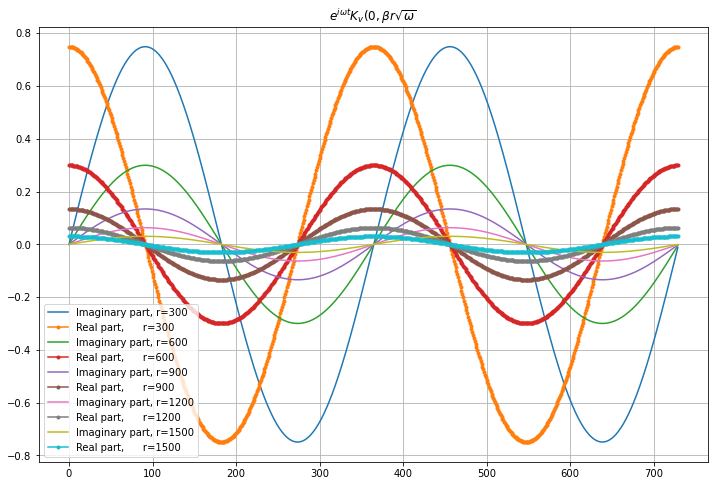

In [78]:
rs = [300, 600, 900, 1200, 1500]
t = np.arange(2 * 365)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# ax.set_title(r'$e^{i \omega t} K_v(0, \beta r \sqrt{i \omega}$') # Wrong
ax.set_title(r'$e^{i \omega t} K_v(0, \beta r \sqrt{\omega}$')
ax.grid()

beta = np.sqrt(S / kD)
for r in rs:
    # h = np.exp(1j * omega * t) * Kv(0, beta * r * np.sqrt(1j * omega)) # Wrong
    h = np.exp(1j * omega * t) * Kv(0, beta * r * np.sqrt(omega))

    ax.plot(t, np.imag(  h), label='Imaginary part, r={}'.format(r))
    ax.plot(t, np.real(h), '.-', label='Real part,      r={}'.format(r))
    
ax.legend()

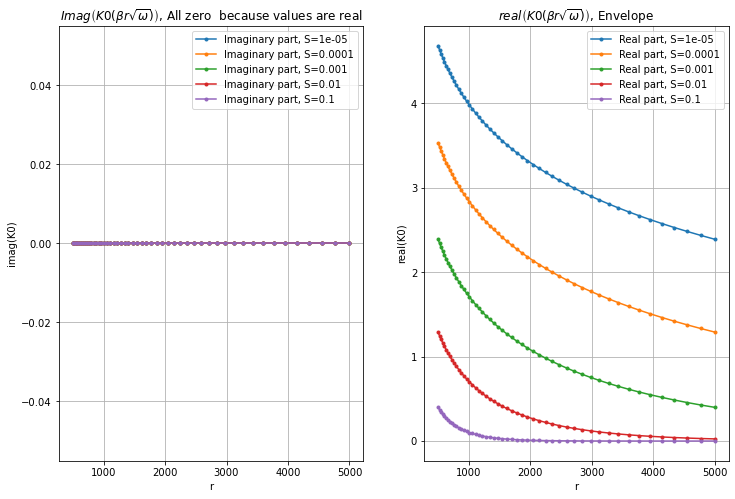

In [81]:

r = np.logspace(np.log10(500), np.log10(5000), 50)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 8)

for S in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
    
    beta = np.sqrt(S / kD)
    
    # k = Kv(0, beta * r * np.sqrt(1j * omega)) # wrong
    k = Kv(0, beta * r * np.sqrt(omega))

    # axs[0].set_title(r'$Imag\left(K0(\beta r \sqrt{i \omega})\right)$') # Wrong
    axs[0].set_title(r'$Imag\left(K0(\beta r \sqrt{\omega})\right)$, All zero  because values are real')
    axs[0].set_xlabel('r')
    axs[0].set_ylabel('imag(K0)')
    axs[0].grid(True)
    axs[0].plot(r, np.imag(k), '.-', label='Imaginary part, S={}'.format(S))
    axs[0].legend()

    # axs[1].set_title(r'$real\left(K0(\beta r \sqrt{i \omega})\right)$') # wrong
    axs[1].set_title(r'$real\left(K0(\beta r \sqrt{\omega})\right)$, Envelope')
    axs[1].set_xlabel('r')
    axs[1].set_ylabel('real(K0)')
    axs[1].grid(True)
    axs[1].plot(r, np.real(k), '.-', label='Real part, S={}'.format(S))
    axs[1].legend()


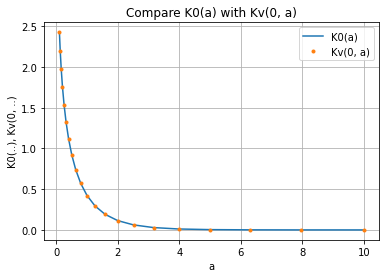

In [45]:
# Verify that Kv(0, a) == K0(a) for a real not complex

fig, ax = plt.subplots()

ax.set_title("Compare K0(a) with Kv(0, a)")
ax.set_xlabel('a')
ax.set_ylabel('K0(..), Kv(0, ..)')
ax.grid(True)
a = np.logspace(-1, 1, 21)
ax.plot(a, K0(a), label='K0(a)')
ax.plot(a, Kv(0, a), '.', label='Kv(0, a)')
ax.legend()
plt.show()

In [71]:
r

array([ 500.        ,  524.05656708,  549.27057099,  575.69769966,
        603.39632032,  632.42760843,  662.8556828 ,  694.74774719,
        728.17423875,  763.20898359,  799.9293598 ,  838.41646841,
        878.75531243,  921.03498466,  965.34886444, 1011.79482386,
       1060.47544396, 1111.49824126, 1164.97590526, 1221.02654727,
       1279.77396135, 1341.34789764, 1405.88434899, 1473.52585128,
       1544.42179824, 1618.72877141, 1696.61088595, 1778.24015311,
       1863.79686016, 1953.46996853, 2047.45753119, 2145.96713006,
       2249.21633448, 2357.43318173, 2470.85668066, 2589.73733962,
       2714.33771966, 2844.93301451, 2981.8116583 , 3125.27596264,
       3275.6427843 , 3433.24422502, 3598.42836501, 3771.56003168,
       3953.02160545, 4143.21386427, 4342.55686876, 4551.49088996,
       4770.47738175, 5000.        ])

            A         B
0    0.000000  0.000000
1    0.006873  0.006873
2    0.013744  0.013744
3    0.020611  0.020611
4    0.027472  0.027472
..        ...       ...
725 -0.034325 -0.034325
726 -0.027472 -0.027472
727 -0.020611 -0.020611
728 -0.013744 -0.013744
729 -0.006873 -0.006873

[730 rows x 2 columns]
            A         B
0    0.000000  0.000000
1    0.000526  0.000526
2    0.001051  0.001051
3    0.001576  0.001576
4    0.002101  0.002101
..        ...       ...
725 -0.002625 -0.002625
726 -0.002101 -0.002101
727 -0.001576 -0.001576
728 -0.001051 -0.001051
729 -0.000526 -0.000526

[730 rows x 2 columns]


/Users/Theo/miniconda3/envs/flopy/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


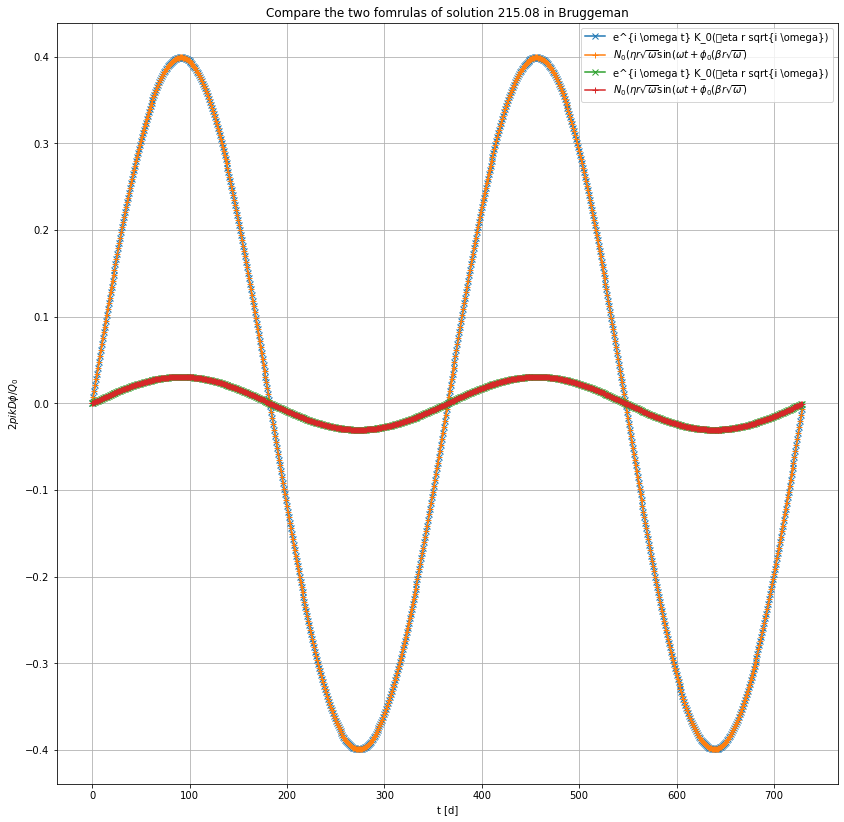

In [76]:
# Verify formulas given by Bruggeeman in his solution 215.05

# Second formula
def brug_phi0(z):
    kz = Kv(0, z / np.sqrt(1j))
    kz = Kv(0, z)
    return np.arctan(np.imag(kz) / np.real(kz))
def brug_n0(z):
    kz = Kv(0, z / np.sqrt(1j))
    kz = Kv(0, z)
    return np.sqrt(np.real(kz) ** 2 + np.imag(kz) ** 2)

fig, ax = plt.subplots()
fig.set_size_inches(14, 14)
ax.grid(True)
ax.set_title("Compare the two fomrulas of solution 215.08 in Bruggeman")
ax.set_xlabel('t [d]')
ax.set_ylabel(r'$2 pi kD \phi /Q_0$')

for r in [500, 1500]:
    # First formula
    A = np.imag(np.exp(1j * omega * t) * Kv(0, beta * r * np.sqrt(1 * omega)))
    #A = np.real(np.exp(1j * omega * t) * Kv(0, beta * r * np.sqrt(1j * omega)))
    
    # Second formula
    b = beta * r * np.sqrt(omega)
    B = brug_n0(b) * np.sin(omega * t  + brug_phi0(b))

    ax.plot(t, A, 'x-', label='e^{i \omega t} K_0(\beta r sqrt{i \omega})')
    ax.plot(t, B, '+-', label=r'$N_0(\eta r \sqrt{\omega} \sin(\omega t + \phi_0(\beta r \sqrt{\omega})$')
    
    data = pd.DataFrame(np.vstack((A, B)).T, columns=['A', 'B'], index=t)
    print(data)
ax.legend()
plt.show()